In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_csv("UNSW_NB15_training-set.csv")

In [3]:
d1.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
d1.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [5]:
d1.shape

(175341, 45)

In [6]:
d1.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [7]:
d1[d1.isna()==True].count()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
d1.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
d1.service.unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [10]:
#numerical data
num_data=d1.describe().columns
#after removing id and label
num_data=num_data[1:40]
num_data

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [11]:
d1[num_data].kurtosis()

dur                     58.608913
spkts                 1964.352894
dpkts                 2465.519335
sbytes                2314.880239
dbytes                2735.831070
rate                    14.211655
sttl                    -1.501442
dttl                    -1.149865
sload                  129.532649
dload                   22.800022
sloss                 2277.960322
dloss                 2942.867138
sinpkt                  61.226887
dinpkt                1158.268746
sjit                   350.559925
djit                  1336.151117
swin                    -1.968644
stcpb                   -0.317010
dtcpb                   -0.316251
dwin                    -1.961275
tcprtt                  51.283386
synack                 117.960404
ackdat                 107.726374
smean                   14.160683
dmean                    7.682510
trans_depth          34407.853786
response_body_len     7750.978239
ct_srv_src               1.341117
ct_state_ttl             4.465755
ct_dst_ltm    

In [12]:
d1[num_data].skew()

dur                    7.496061
spkts                 40.217703
dpkts                 36.764114
sbytes                45.303443
dbytes                39.760864
rate                   3.319495
sttl                  -0.678109
dttl                   0.895010
sload                  8.703399
dload                  4.691217
sloss                 44.753662
dloss                 41.380270
sinpkt                 7.917535
dinpkt                29.679512
sjit                  17.652157
djit                  29.543830
swin                   0.177048
stcpb                  1.081121
dtcpb                  1.081017
dwin                   0.196820
tcprtt                 4.038359
synack                 5.786286
ackdat                 5.615605
smean                  3.726623
dmean                  2.826146
trans_depth          167.335829
response_body_len     76.340075
ct_srv_src             1.521178
ct_state_ttl           0.928414
ct_dst_ltm             2.050110
ct_src_dport_ltm       2.171187
ct_dst_s

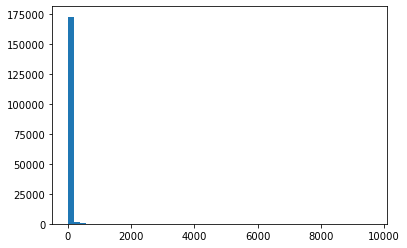

In [13]:
plt.hist(d1.spkts,bins=50)
plt.show()

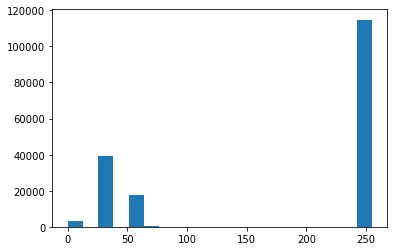

In [14]:
plt.hist(d1.sttl,bins=20)
plt.show()

In [15]:
#to transform data like in a limit 
#log transform for num_data
import copy
trans_data=copy.deepcopy(d1)
trans_data[num_data]=np.log(1+d1[num_data])

In [16]:
trans_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.114647,tcp,-,FIN,1.945910,1.609438,5.556828,5.153292,4.318654,...,0.693147,0.693147,0.000000,0.000000,0.0,0.693147,0.693147,0.0,Normal,0
1,2,0.500716,tcp,-,FIN,2.708050,3.663562,6.599870,10.645782,4.375422,...,0.693147,1.098612,0.000000,0.000000,0.0,0.693147,1.945910,0.0,Normal,0
2,3,0.964368,tcp,-,FIN,2.197225,2.833213,5.899897,9.486987,2.719330,...,0.693147,1.386294,0.000000,0.000000,0.0,1.098612,1.945910,0.0,Normal,0
3,4,0.986429,tcp,ftp,FIN,2.564949,2.564949,6.444131,6.647688,2.686289,...,0.693147,1.386294,0.693147,0.693147,0.0,1.098612,0.693147,0.0,Normal,0
4,5,0.371187,tcp,-,FIN,2.397895,1.945910,6.282267,5.594711,3.537295,...,0.693147,3.713572,0.000000,0.000000,0.0,1.098612,3.688879,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,1.098612,0.000000,4.744932,0.000000,11.618295,...,2.639057,3.218876,0.000000,0.000000,0.0,3.218876,3.218876,0.0,Generic,1
175337,175338,0.409299,tcp,-,FIN,2.397895,2.197225,6.431331,5.872118,3.544219,...,0.693147,1.098612,0.000000,0.000000,0.0,0.693147,0.693147,0.0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,1.098612,0.000000,4.744932,0.000000,11.618295,...,1.386294,2.639057,0.000000,0.000000,0.0,1.386294,2.564949,0.0,Generic,1
175339,175340,0.000009,udp,dns,INT,1.098612,0.000000,4.744932,0.000000,11.618295,...,2.708050,3.433987,0.000000,0.000000,0.0,3.433987,3.433987,0.0,Generic,1


In [17]:
trans_data['loss']=trans_data['dbytes']-trans_data['sbytes']

In [18]:
trans_data.kurtosis()

id                   -1.200000
dur                  13.804252
spkts                 0.967513
dpkts                -0.114233
sbytes                1.604716
dbytes               -1.221277
rate                 -1.533249
sttl                  4.256688
dttl                 -1.705963
sload                -0.541126
dload                -1.449560
sloss                 2.591591
dloss                 3.485820
sinpkt                1.383361
dinpkt               -0.563873
sjit                 -1.522975
djit                 -0.533155
swin                 -1.968689
stcpb                -1.943395
dtcpb                -1.943500
dwin                 -1.961293
tcprtt               12.153946
synack               32.516060
ackdat               33.599253
smean                 3.793568
dmean                -1.542616
trans_depth          12.252420
response_body_len    17.366005
ct_srv_src           -0.996543
ct_state_ttl         -0.620809
ct_dst_ltm           -0.541359
ct_src_dport_ltm     -0.126493
ct_dst_s

In [19]:
trans_data.skew()

id                   0.000000
dur                  3.366384
spkts                1.116330
dpkts                0.784531
sbytes               1.169003
dbytes               0.371869
rate                -0.202975
sttl                -1.789387
dttl                 0.195629
sload               -0.475929
dload                0.314908
sloss                1.376688
dloss                1.786355
sinpkt               1.240509
dinpkt               0.901420
sjit                 0.430264
djit                 0.847629
swin                 0.176941
stcpb                0.207972
dtcpb                0.208044
dwin                 0.196757
tcprtt               2.400899
synack               3.432785
ackdat               3.427472
smean                2.029467
dmean                0.218497
trans_depth          2.924598
response_body_len    4.168025
ct_srv_src           0.433191
ct_state_ttl        -0.548459
ct_dst_ltm           0.845749
ct_src_dport_ltm     1.171539
ct_dst_sport_ltm     1.235297
ct_dst_src

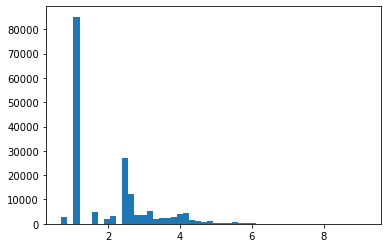

In [20]:
plt.hist(trans_data.spkts,bins=50)
plt.show()

In [21]:
trans_data['loss']=trans_data['dbytes']-trans_data['sbytes']

<AxesSubplot:>

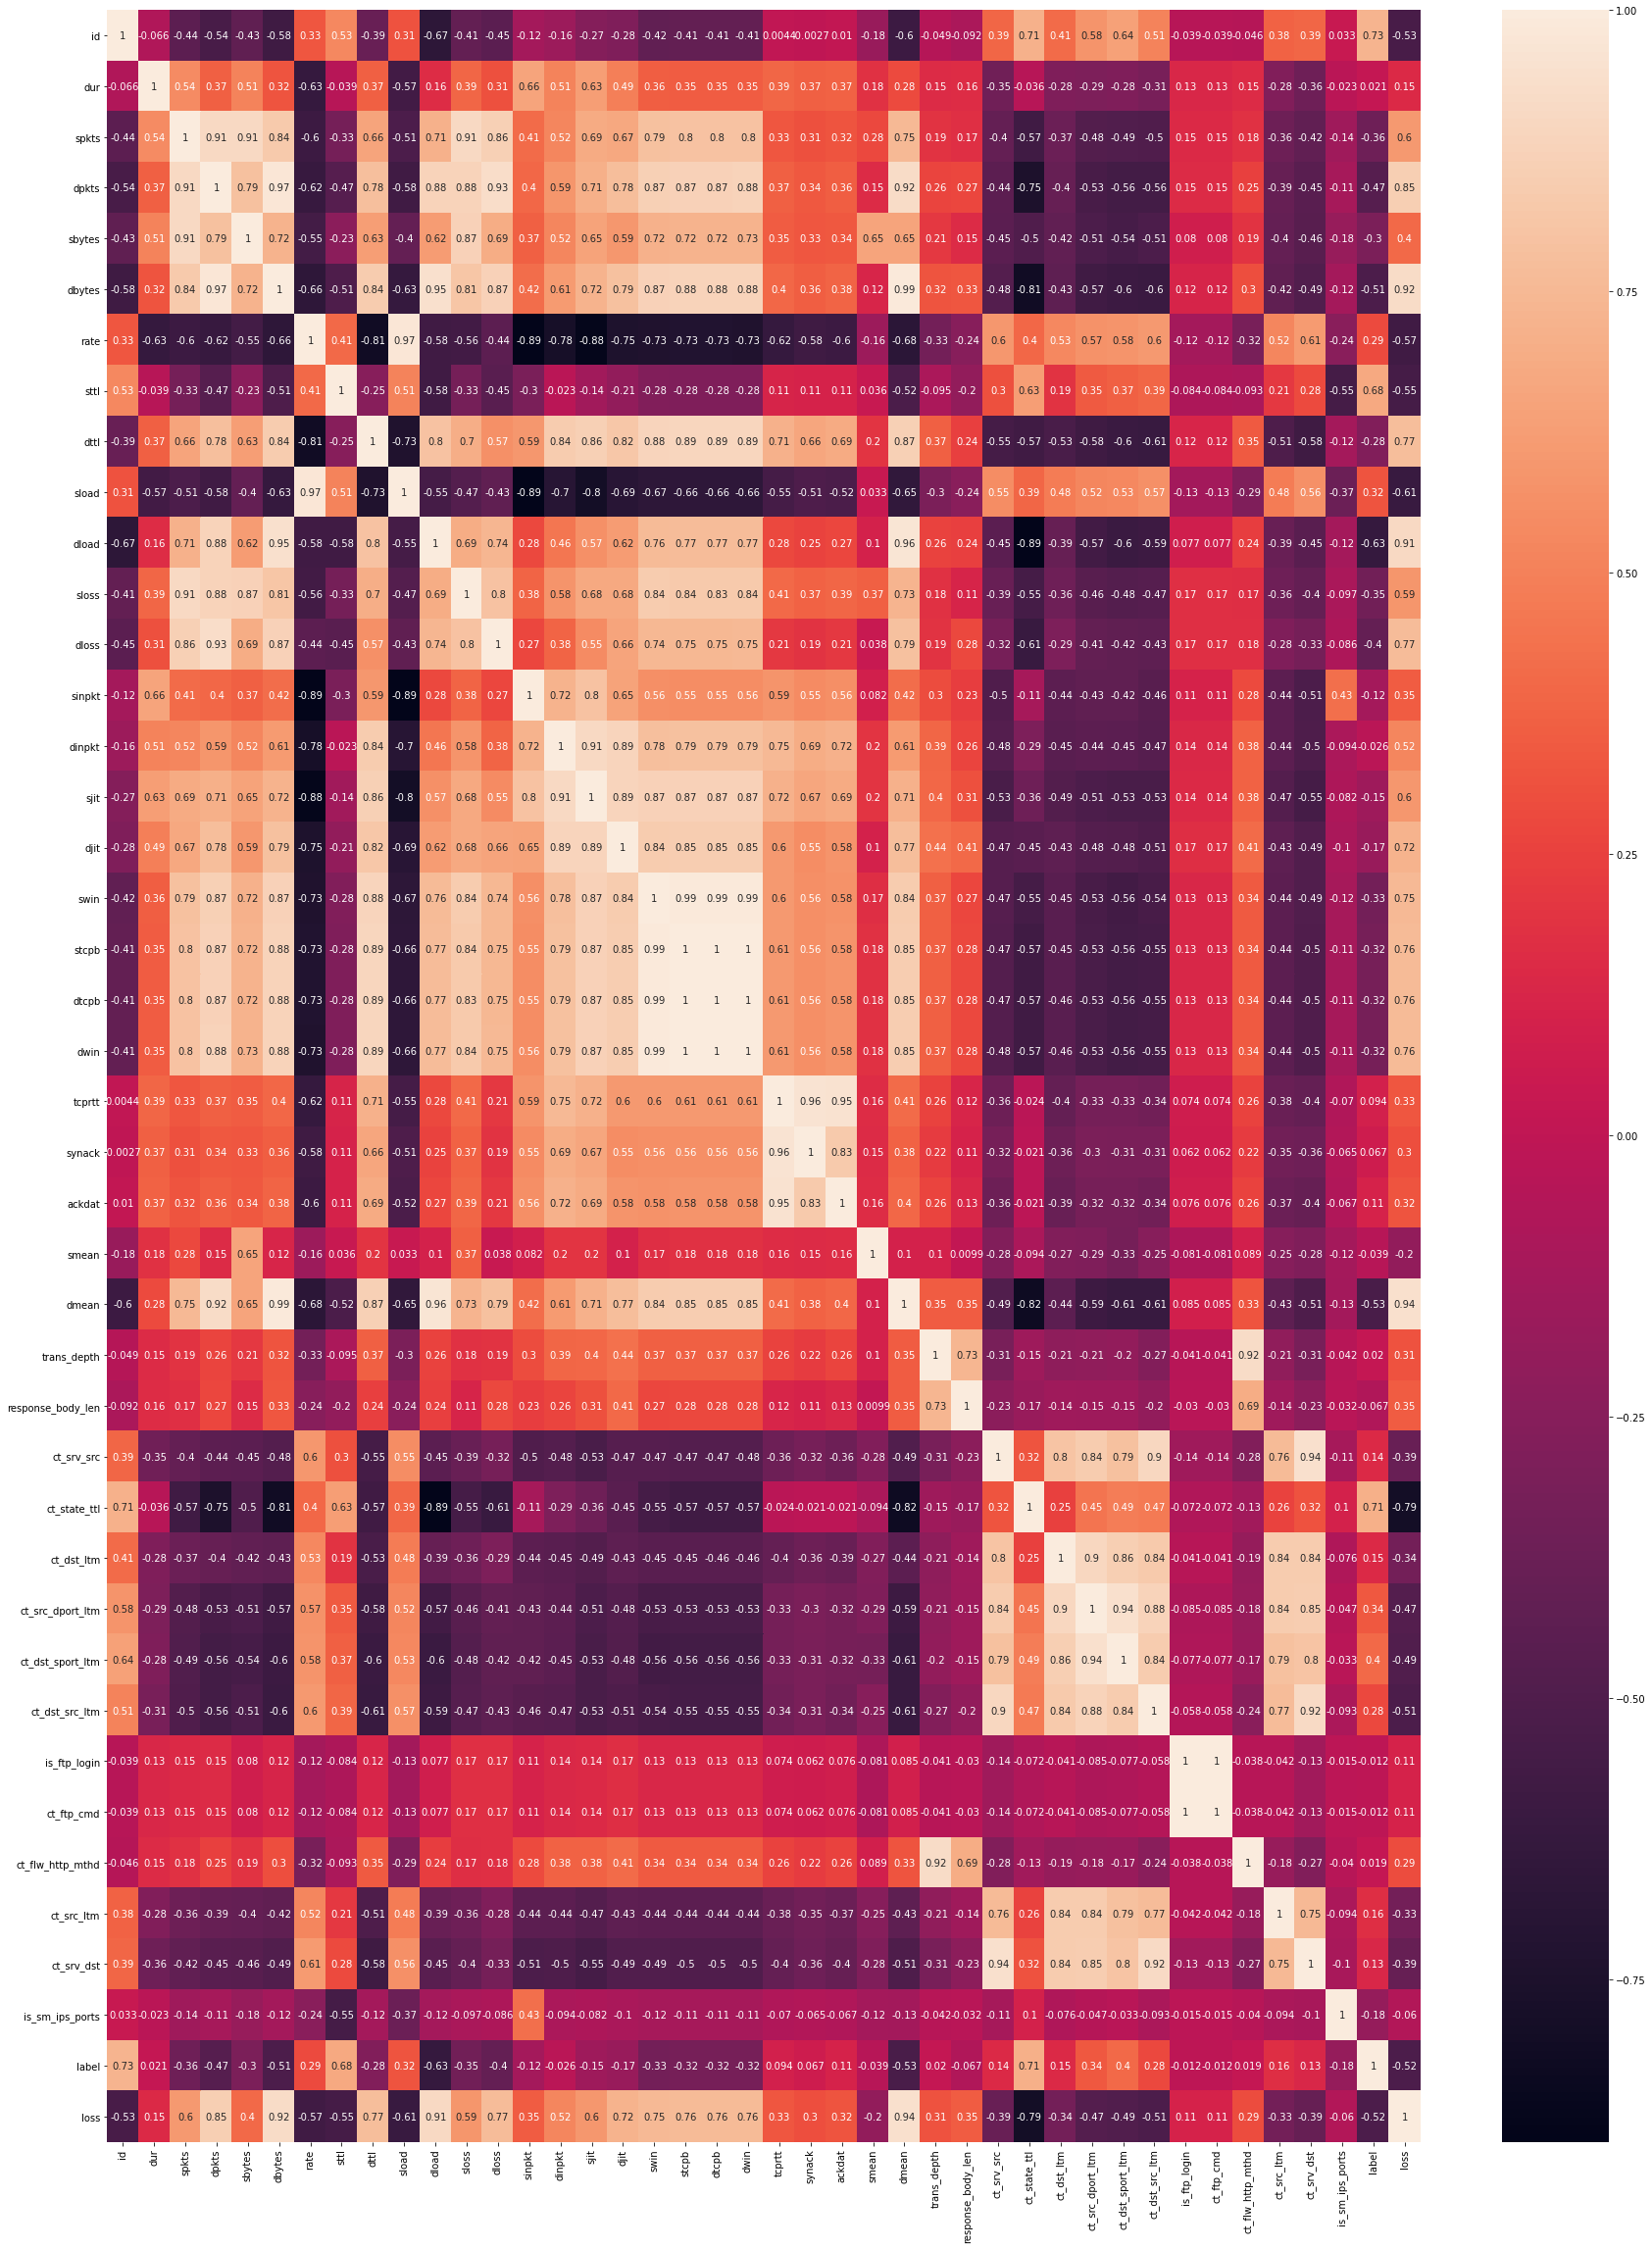

In [22]:
import seaborn as sns
plt.figure(figsize=(30,40))
sns.heatmap(trans_data.corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler=StandardScaler()

In [24]:
chosen=['sttl','ct_state_ttl','ct_src_ltm','ct_srv_dst','ct_srv_src','ct_dst_ltm','dmean','dload','dbytes','loss','ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm']

In [25]:
X=trans_data[chosen]
y=trans_data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [27]:
knn.score(X_train,y_train)

0.9514847344207444

In [28]:
accuracy_score(pred,y_test)

0.9447390932420873

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LinearRegression().fit(X_train,y_train)

In [31]:
lr.score(X_train,y_train)

0.6848959635898413

In [32]:
lr.score(X_test,y_test)

0.6778195466004227

In [33]:
logr=LogisticRegression().fit(X_train,y_train)

In [34]:
logr.score(X_train,y_train)

0.923722798879637

In [35]:
logr.score(X_test,y_test)

0.9191901910464785

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf = RandomForestClassifier(n_estimators=1000,max_features=5,bootstrap=True,random_state=7)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=1000, random_state=7)

In [38]:
clf.score(X_test,y_test)

0.9588252067293983

In [39]:
clf.score(X_train,y_train)

0.9968315526659316

Time to test with actual testing set

In [40]:
test_data=pd.read_csv("UNSW_NB15_testing-set.csv")

In [41]:
test_data.shape

(82332, 45)

In [42]:
test_data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


We need to do the same type of preprocessing for both the training and test set.
As both sets must come from the same distribution.

In [43]:
test_data[num_data]=np.log(1+test_data[num_data])

In [44]:
test_data.skew()

id                    0.000000
dur                   3.224474
spkts                 1.075176
dpkts                 0.692811
sbytes                1.114123
dbytes                0.248942
rate                 -0.033330
sttl                 -1.719374
dttl                  0.004527
sload                -0.254374
dload                 0.215175
sloss                 1.265456
dloss                 1.827054
sinpkt                0.962919
dinpkt                0.749781
sjit                  0.242726
djit                  0.690386
swin                 -0.093752
stcpb                -0.001373
dtcpb                -0.000636
dwin                 -0.012625
tcprtt                3.756920
synack                6.419753
ackdat                5.082881
smean                 1.909331
dmean                 0.073006
trans_depth           2.989419
response_body_len     4.111906
ct_srv_src            0.416678
ct_state_ttl         -0.352193
ct_dst_ltm            1.105902
ct_src_dport_ltm      1.482725
ct_dst_s

In [45]:
test_data['loss']=test_data['dbytes']-test_data['sbytes']

In [46]:
trans_data=trans_data.drop(['id'],axis=1)
test_data=test_data.drop(['id'],axis=1)
frames=[trans_data,test_data]

In [47]:
data=pd.concat(frames)

In [48]:
data.shape

(257673, 45)

In [49]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,loss
0,0.114647,tcp,-,FIN,1.945910,1.609438,5.556828,5.153292,4.318654,5.533389,...,0.693147,0.000000,0.000000,0.0,0.693147,0.693147,0.000000,Normal,0,-0.403536
1,0.500716,tcp,-,FIN,2.708050,3.663562,6.599870,10.645782,4.375422,4.143135,...,1.098612,0.000000,0.000000,0.0,0.693147,1.945910,0.000000,Normal,0,4.045911
2,0.964368,tcp,-,FIN,2.197225,2.833213,5.899897,9.486987,2.719330,4.143135,...,1.386294,0.000000,0.000000,0.0,1.098612,1.945910,0.000000,Normal,0,3.587089
3,0.986429,tcp,ftp,FIN,2.564949,2.564949,6.444131,6.647688,2.686289,4.143135,...,1.386294,0.693147,0.693147,0.0,1.098612,0.693147,0.000000,Normal,0,0.203557
4,0.371187,tcp,-,FIN,2.397895,1.945910,6.282267,5.594711,3.537295,5.541264,...,3.713572,0.000000,0.000000,0.0,1.098612,3.688879,0.000000,Normal,0,-0.687555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,1.098612,0.000000,4.653960,0.000000,12.206078,5.541264,...,1.098612,0.000000,0.000000,0.0,1.098612,0.693147,0.000000,Normal,0,-4.653960
82328,0.744838,tcp,-,FIN,3.044522,2.197225,9.801621,5.872118,3.235145,5.541264,...,0.693147,0.000000,0.000000,0.0,1.386294,1.098612,0.000000,Normal,0,-3.929503
82329,0.000000,arp,-,INT,0.693147,0.000000,3.850148,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.0,0.693147,0.693147,0.693147,Normal,0,-3.850148
82330,0.000000,arp,-,INT,0.693147,0.000000,3.850148,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.0,0.693147,0.693147,0.693147,Normal,0,-3.850148


In [71]:
X=data[chosen]
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.07,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
X_train.shape

(239635, 13)

In [73]:
X_test.shape

(18038, 13)

In [74]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [75]:
knn.score(X_test,y_test)

0.9326421998004213

In [ ]:
clf = RandomForestClassifier(bootstrap=True,n_estimators=1000,max_features=5,random_state=42)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)